In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

> Dataset: https://www.kaggle.com/code/trondataana/alzheimer-prediction-0-853-accuracy

Column Descriptions:
- Group --> Class
- Age --> Age
- EDUC --> Years of Education
- SES --> Socioeconomic Status / 1-5
- MMSE --> Mini Mental State Examination
- CDR --> Clinical Dementia Rating
- eTIV --> Estimated total intracranial volume
- nWBV --> Normalize Whole Brain Volume
- ASF --> Atlas Scaling Factor

In [130]:
df = pd.read_csv("./Data/alzheimer.csv")
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [111]:
df = df.dropna()
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [112]:
# Convert group to numerical values
df["Group"] = df["Group"].map({"Nondemented": 0, "Demented": 1, "Converted": 2})

# Convert gender to numerical values
df["M/F"] = df["M/F"].map({"M": 0, "F": 1})
df

C:\Users\tshar\AppData\Local\Temp\ipykernel_48196\1684849936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Group"] = df["Group"].map({"Nondemented": 0, "Demented": 1, "Converted": 2})
C:\Users\tshar\AppData\Local\Temp\ipykernel_48196\1684849936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["M/F"] = df["M/F"].map({"M": 0, "F": 1})


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


<Axes: xlabel='ASF', ylabel='Count'>

<Figure size 1000x600 with 0 Axes>

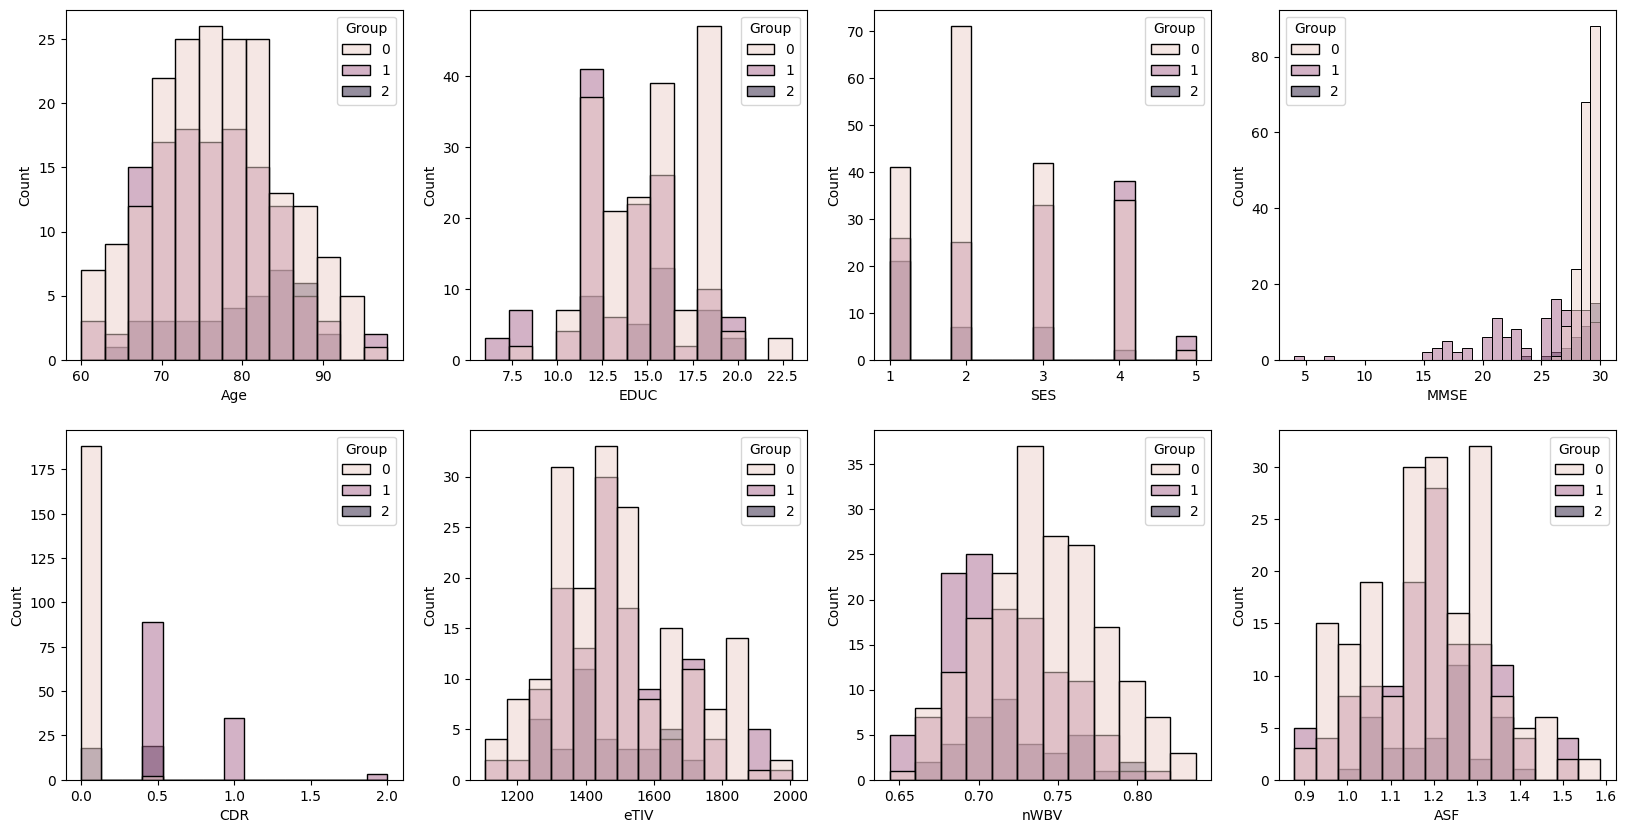

In [126]:
# Histogram distribution with groups
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(data=df, x='Age', hue='Group', ax=axs[0, 0])
sns.histplot(data=df, x='EDUC', hue='Group', ax=axs[0, 1])
sns.histplot(data=df, x='SES', hue='Group', ax=axs[0, 2])
sns.histplot(data=df, x='MMSE', hue='Group', ax=axs[0, 3])
sns.histplot(data=df, x='CDR', hue='Group', ax=axs[1, 0])
sns.histplot(data=df, x='eTIV', hue='Group', ax=axs[1, 1])
sns.histplot(data=df, x='nWBV', hue='Group', ax=axs[1, 2])
sns.histplot(data=df, x='ASF', hue='Group', ax=axs[1, 3])

Dementia chances increases at the age 65\
Dementia chances reduces at the age 85 but chances of conversions remain\
Dementia chances reduces if MMSE score is really high\
MORE THE EDUCATION Lesser chance of dementia\
High ses means chances increase for dementia \
People with higher nWBV have lesser chaces for dementia\
Chances of dementia are normally distributed with asf with the peak of 1.2

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produ

<Figure size 1000x800 with 0 Axes>

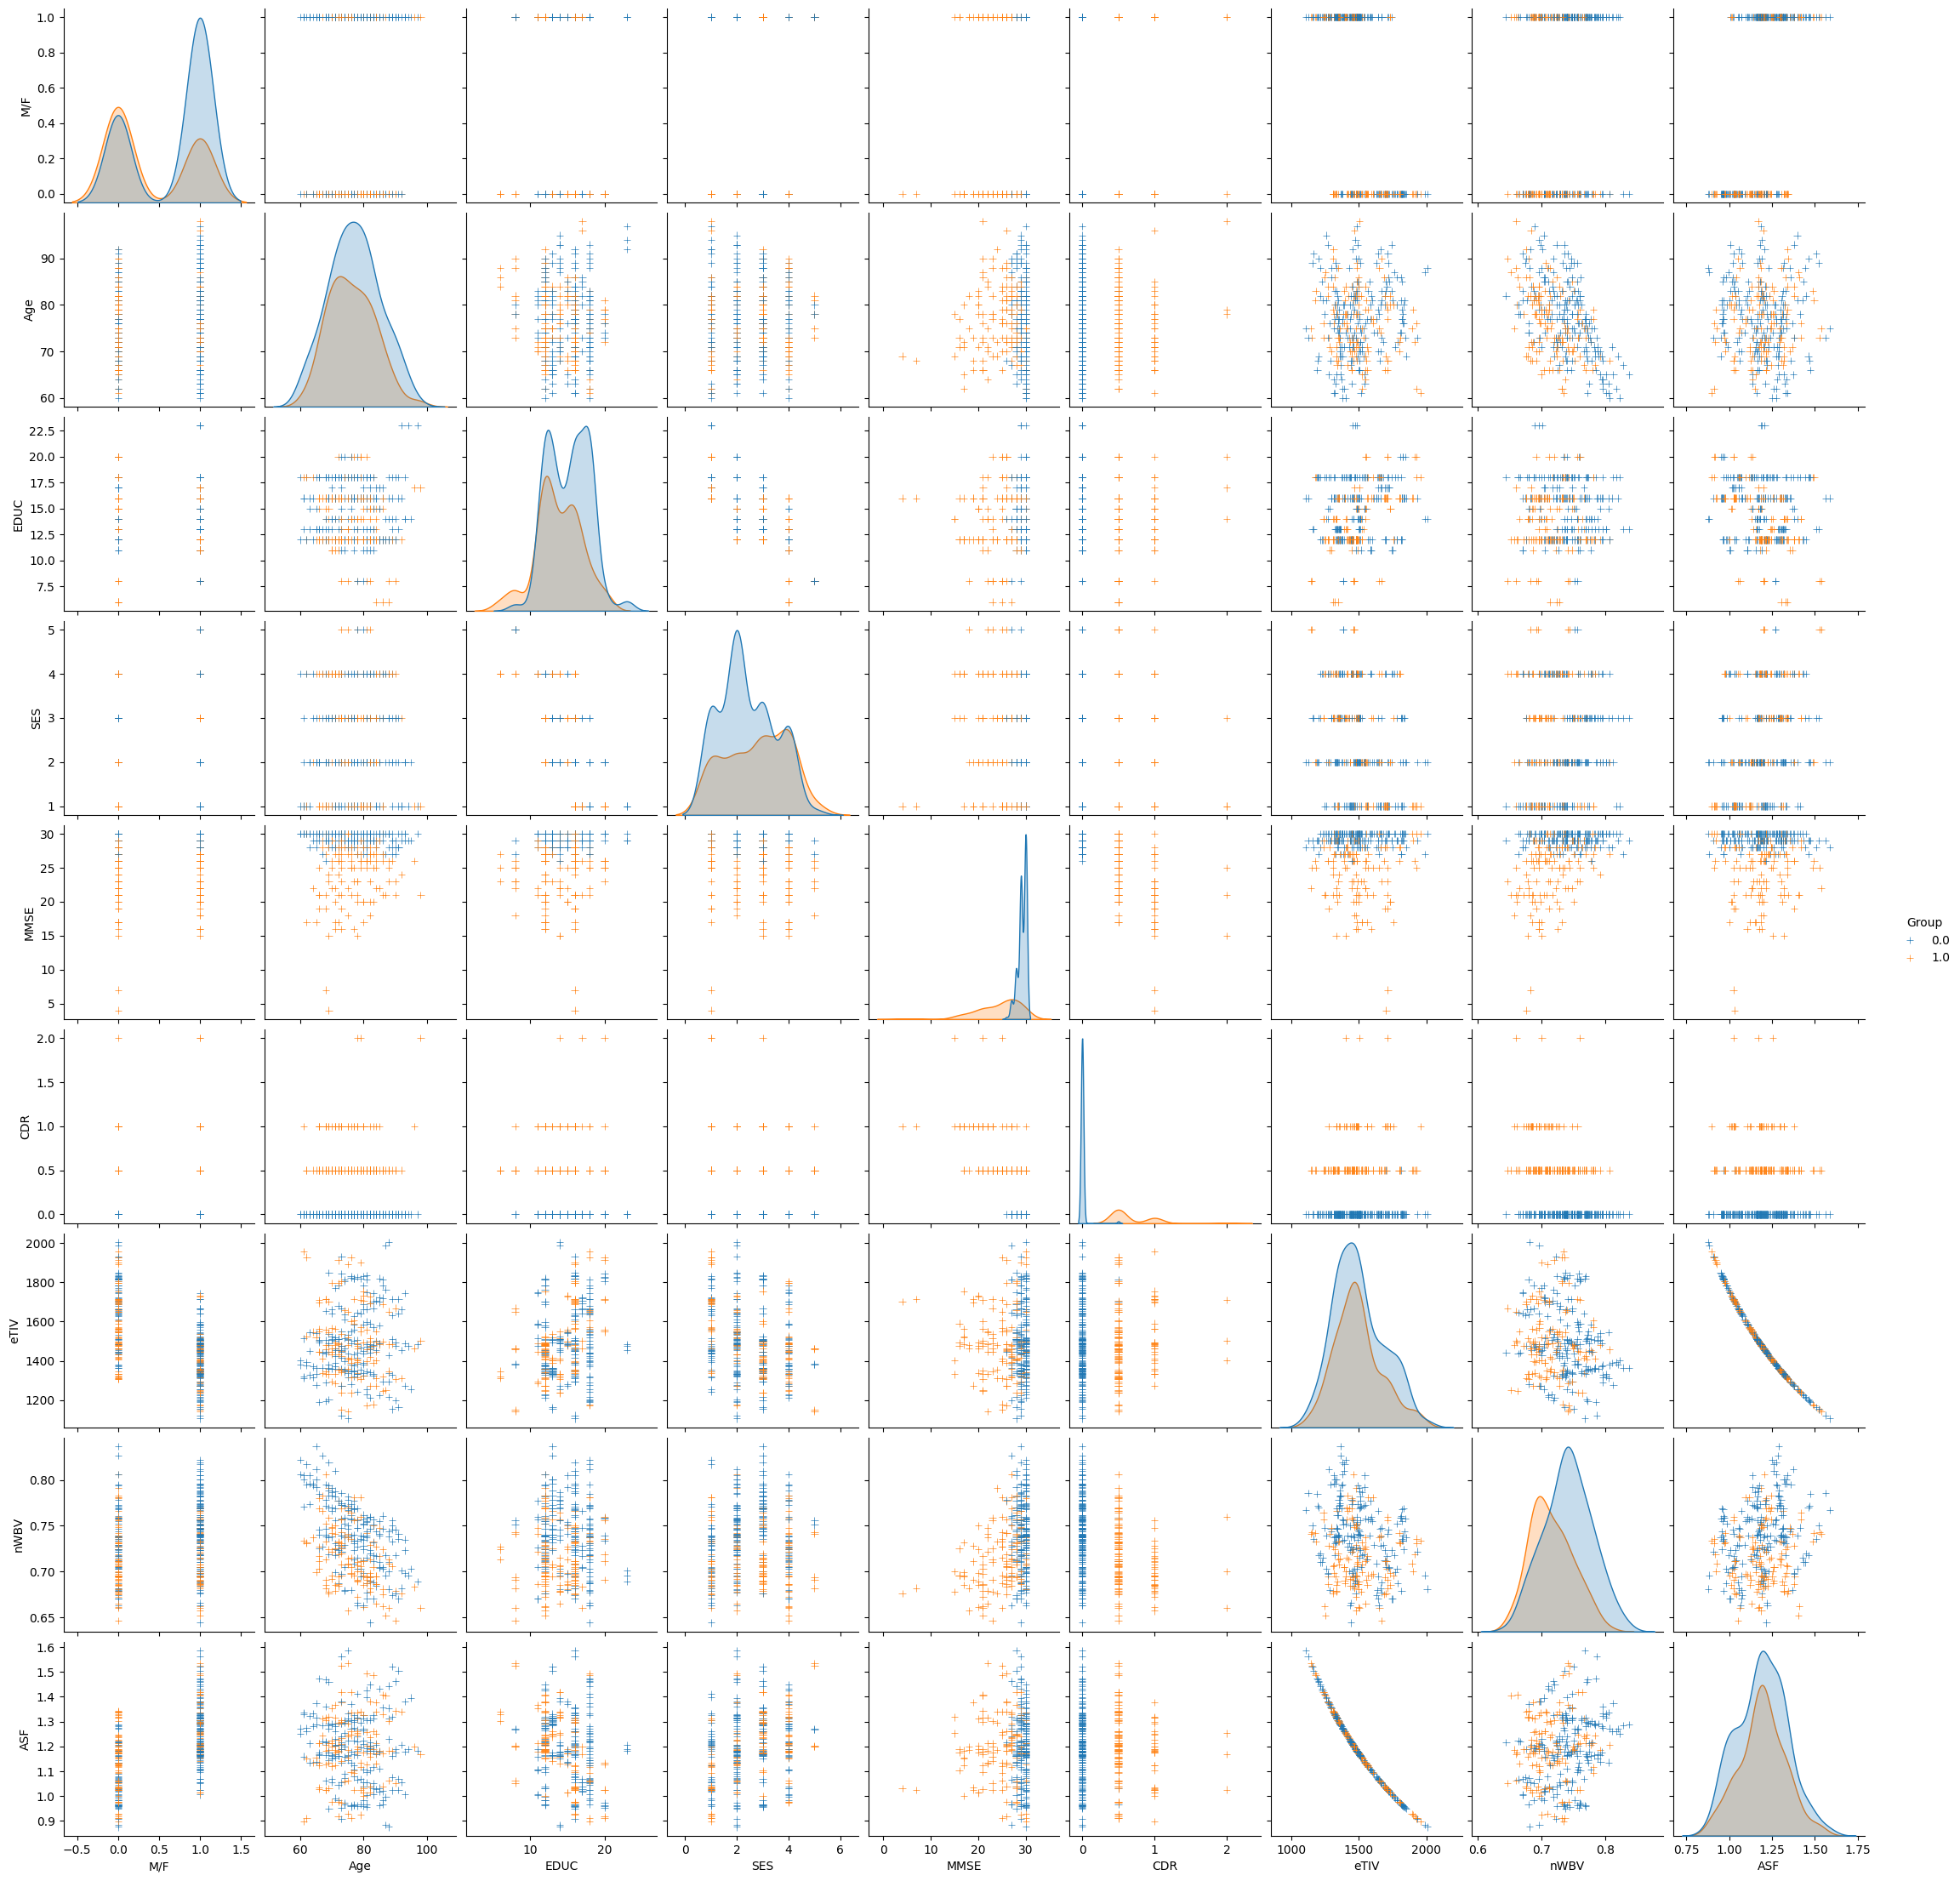

In [103]:
# Correlation matrix
fig = plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap="flare")

sns.pairplot(data=df, hue="Group", markers=["+"])

We can see clear seperations in CDR and MMSE

<Axes: xlabel='M/F', ylabel='ASF'>

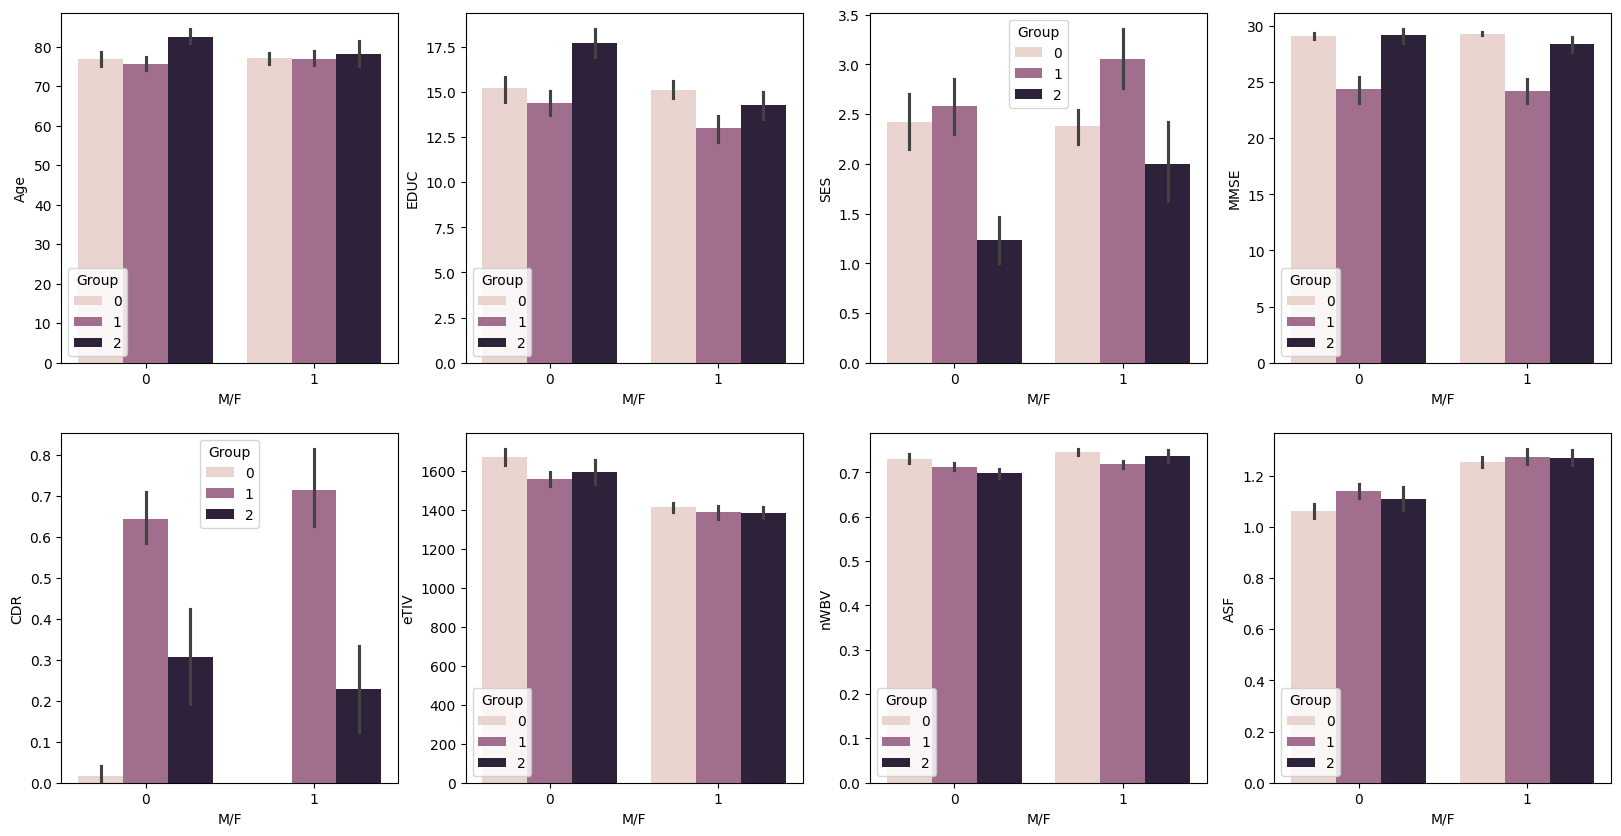

In [128]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.barplot(data=df, x='M/F', y='Age', hue='Group', ax=axs[0, 0])
sns.barplot(data=df, x='M/F', y='EDUC', hue='Group', ax=axs[0, 1])
sns.barplot(data=df, x='M/F', y='SES', hue='Group', ax=axs[0, 2])
sns.barplot(data=df, x='M/F', y='MMSE', hue='Group', ax=axs[0, 3])
sns.barplot(data=df, x='M/F', y='CDR', hue='Group', ax=axs[1, 0])
sns.barplot(data=df, x='M/F', y='eTIV', hue='Group', ax=axs[1, 1])
sns.barplot(data=df, x='M/F', y='nWBV', hue='Group', ax=axs[1, 2])
sns.barplot(data=df, x='M/F', y='ASF', hue='Group', ax=axs[1, 3])

- **Higher education levels (EDUC)** are linked to a lower risk of dementia in both men and women.
- **Higher socioeconomic status (SES)** is generally associated with an increased risk of dementia.
- **Men with lower SES** are more likely to experience dementia progression.
- **Higher MMSE (Mini Mental State Examination) scores** correspond to a reduced likelihood of dementia.
- **A higher Clinical Dementia Rating (CDR)** confirms the presence of dementia.
- **Larger estimated total intracranial volume (eTIV)** is linked to a lower risk of dementia.
- **Higher normalized whole brain volume (nWBV)** is associated with reduced dementia risk.
- **People with a higher Atlas Scaling Factor (ASF)** are more likely to develop dementia.
